In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
tickers = ['^J203.JO','MTNOY', 'NPSNY']

data = pd.DataFrame()

for t in tickers:
    data[t] = yf.download(t, start='2014-1-1')['Adj Close']



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


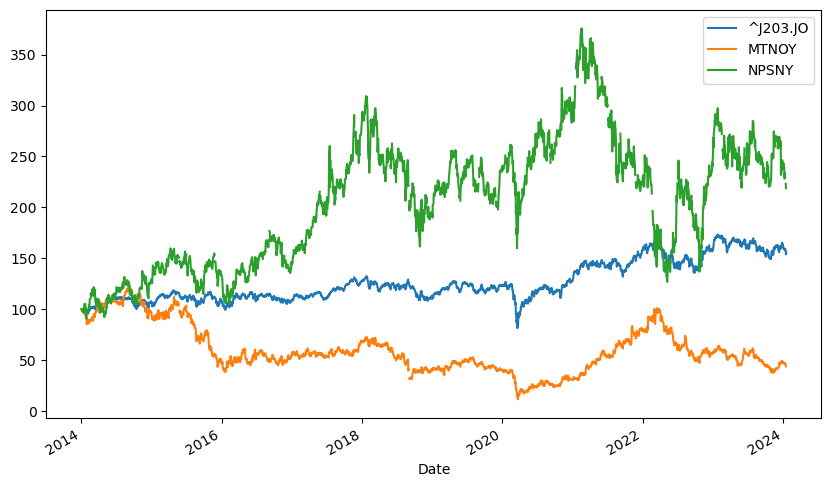

In [7]:
data_plot = (data/data.iloc[0]*100).plot(figsize=(10,6))

In [ ]:
# LETS GET THE PORTFOLIO RETURNS

In [8]:
port_ret = np.log(data/data.shift(1))

In [10]:
port_ret.tail()

,^J203.JO,MTNOY,NPSNY
Date,,,
2024-01-12,0.005490,0.009901,-0.006879
2024-01-15,-0.007640,NaN,NaN
2024-01-16,-0.009110,NaN,NaN
2024-01-17,-0.018169,-0.029388,-0.018803
2024-01-18,0.009085,NaN,NaN


In [11]:
# LETS GET THE MEAN RETURNS

port_ret.mean()*250

^J203.JO    0.043592
MTNOY      -0.038318
NPSNY       0.133369
dtype: float64

In [ ]:
# to obtain the best portfolio returns, we need to weigh our portfolio more towards our AlSI index and naspers share, as MTN 
# has average negative return

In [ ]:
# LETS GET THE COVARIANCE AND VARIANCES OF THE PORTS

In [12]:
port_ret.cov()*250

,^J203.JO,MTNOY,NPSNY
^J203.JO,0.031250,0.038013,0.041875
MTNOY,0.038013,0.216634,0.073296
NPSNY,0.041875,0.073296,0.194186


In [14]:
port_ret.corr()

,^J203.JO,MTNOY,NPSNY
^J203.JO,1.000000,0.457312,0.532087
MTNOY,0.457312,1.000000,0.357362
NPSNY,0.532087,0.357362,1.000000


In [15]:
num_assets = len(tickers)

In [23]:
# LETS GET THE NECESSARY WEIGHTS FOR THE ASSETS
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.38553178, 0.05534344, 0.55912478])

In [24]:
# EXPECTED PORT RETURNS

port_return = np.sum(weights*port_ret.mean())*250

In [25]:
port_return

0.08925518143143477

In [27]:
# EXPECTED PORT VOL: WE WILL USE MATRIX METHOD TO GET VOLATILTY

port_var = np.dot(weights.T, np.dot(port_ret.cov()*250, weights))
np.sqrt(port_var)

0.300376975193366

In [28]:
# lets obtain the efficient frontier

pfolio_ret = []
pfolio_vol = []

for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_ret.append(np.sum(weights*port_ret.mean())*250)
    pfolio_vol.append(np.sqrt(np.dot(weights.T, np.dot(port_ret.cov()*250, weights))))
    
pfolio_ret = np.array(pfolio_ret)
pfolio_vol = np.array(pfolio_vol)

pfolio_ret, pfolio_vol

(array([ 5.72461492e-02,  8.79792457e-02,  5.68056297e-02,  1.06324284e-01,
        -9.66670441e-04,  4.51869778e-02,  5.91119484e-02,  5.58715957e-02,
         1.68165764e-02,  7.04045600e-02,  4.03027725e-02,  3.68668640e-02,
         3.59327438e-02,  3.48603362e-02,  4.79619653e-02,  8.74635494e-02,
         4.01012042e-02,  4.25386332e-02,  2.96843662e-02,  7.77176872e-02,
         4.64923820e-02,  3.49074423e-02,  1.44849148e-02,  6.16194005e-02,
         3.35438838e-02, -2.66082943e-04,  2.08098079e-02,  2.42030638e-02,
         5.85107503e-02,  4.71035026e-02,  6.38691539e-03,  3.27913486e-02,
         2.36881827e-02,  8.19975829e-03,  9.23182857e-02,  5.20040135e-02,
         6.15274936e-02,  4.05504169e-02,  1.74953703e-02,  7.25235038e-02,
         2.40585073e-02,  6.68038556e-02,  8.11157919e-03,  7.20667735e-02,
         5.05138773e-02,  6.81779686e-02,  8.67634440e-03,  2.82088084e-02,
         3.66421855e-02,  8.59487814e-02,  4.18857111e-02,  6.81790611e-02,
         5.6

In [30]:
# TO PLOT THE EFFIECIENT FRONTIER, WE NEED TO CREATE A PD DATAFRAME WITH A DICTIONARY OF ALL THE SIMUATED PFOLIO RETURNS AMD VOL.

my_port = pd.DataFrame({'Returns': pfolio_ret, 'Volatility': pfolio_vol})



,Returns,Volatility
995,0.110303,0.359370
996,-0.018606,0.391700
997,0.054736,0.276900
998,0.061655,0.370770
999,0.057895,0.270453


<Axes: xlabel='Volatility', ylabel='Returns'>

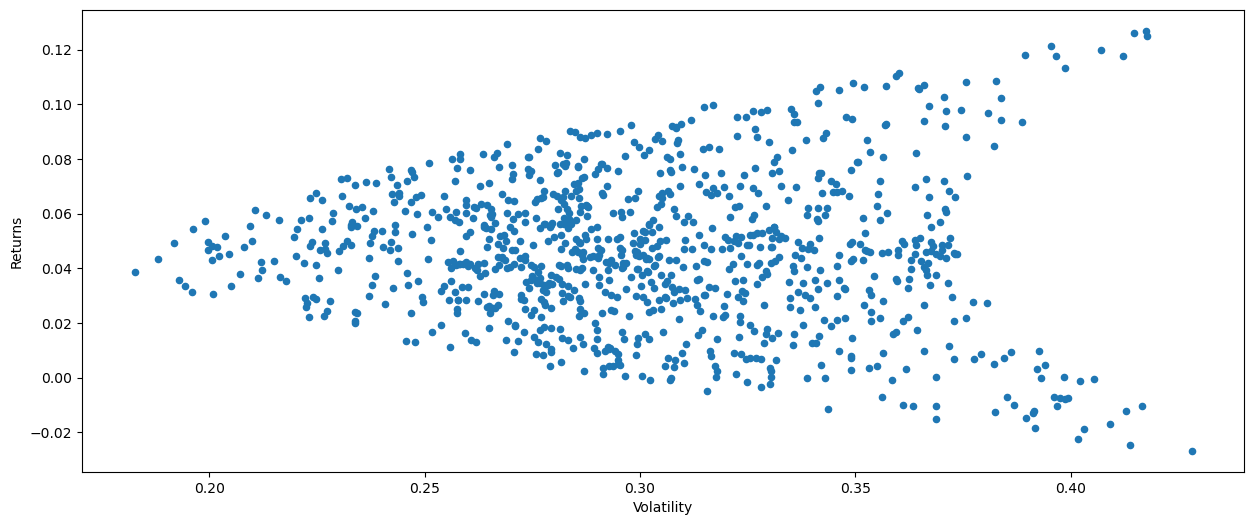

In [32]:
# LETS PLOT THE EFFICIENT FRONTIER

my_port.plot(x='Volatility', y='Returns', kind='scatter',figsize=(15,6))

In [ ]:
# best portfolios lie on the efficient frontier

In [ ]:
git init
git add README.md
git commit -m "first commit"
git branch -M main
git remote add origin https://github.com/Prince-chilly1-byte/python_finance_projects.git
git push -u origin main